In [33]:
from anchor import utils
from anchor import anchor_tabular
import pandas as pd
import sklearn.ensemble
import numpy as np
from anchor import anchor_tabular
import os

In [34]:
feature_names = None
features_to_use = [2, 4, 5, 6, 7, 9]
categorical_features = [2, 4, 7]

target_idx = 1
dataset_folder = train_path = "../../datasets/titanic/"
discretize = True
balance = True

def filter_fn(data):
  df = pd.DataFrame(data)

  df.dropna(inplace=True)
  ###
  return df.values.astype('|S128')

dataset = utils.load_csv_dataset(
            os.path.join(dataset_folder, 'train.csv'), target_idx, ',',
            feature_names=feature_names, features_to_use=features_to_use,
            categorical_features=categorical_features, discretize=discretize,
            balance=balance, filter_fn = filter_fn, skip_first=True)

In [35]:
print(dataset.train[0])

[0. 0. 1. 2. 2. 3.]


In [36]:
c = sklearn.ensemble.RandomForestClassifier(n_estimators=50, n_jobs=5)
c.fit(dataset.train, dataset.labels_train)
#print(np.unique(dataset.labels_train))
print('Train', sklearn.metrics.accuracy_score(dataset.labels_train, c.predict(dataset.train)))
print('Test', sklearn.metrics.accuracy_score(dataset.labels_test, c.predict(dataset.test)))

Train 0.8921389396709324
Test 0.9420289855072463


In [37]:
transformed_data = []

for r in dataset.train:
    transformed_data.append([dataset.categorical_names[i][int(r_)] for i, r_ in enumerate(r)])        

print(transformed_data[0])

train_data = pd.DataFrame(transformed_data, columns=dataset.feature_names)
print(train_data.shape)
nb_vals = 100

print(dataset.train[0])
print(dataset.train[0].reshape(1, -1))
y=[]
for k in range(0, nb_vals):
    y.append(c.predict(dataset.train[k].reshape(1, -1))[0])


['1', 'female', '6.00 < Age <= 24.00', 'SibSp > 1.00', '2', 'Fare > 31.00']
(547, 6)
[0. 0. 1. 2. 2. 3.]
[[0. 0. 1. 2. 2. 3.]]


In [38]:
import sys
sys.path.append(sys.path[0] + '/..')

import arg_explainer as ae
from importlib import reload
import MinimaliT
reload(ae)
reload(MinimaliT)
import arg_explainer as ae

print(dataset.feature_names)
explainer = ae.ArgTabularExplainer(c, train_data.iloc[0:nb_vals], y, 'titanic_' + str(nb_vals), compute=True, output_path='../saves')

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
Generating arguments
len  1 : 1 ,  0
20 potential arg checked ( 0 not minimal)
len  2 : 6 ,  27
138 potential arg checked ( 5 not minimal)
len  3 : 35 ,  34
249 potential arg checked ( 174 not minimal)
len  4 : 12 ,  3
117 potential arg checked ( 414 not minimal)
len  5 : 0 ,  0
19 potential arg checked ( 269 not minimal)
len  6 : 0 ,  0
0 potential arg checked ( 58 not minimal)
Saving to  ../saves\titanic_100_minimals.df


In [39]:
G = explainer.build_attack_graph(compute=True, display_graph=False)
print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

explainer.export_graph('asp', '../saves')

54 64  args total
titanic_100
edges per node: 40.33898305084746


['titanic_100_atk_graph.df'] ['titanic_100_R_atk.df']
[2380]


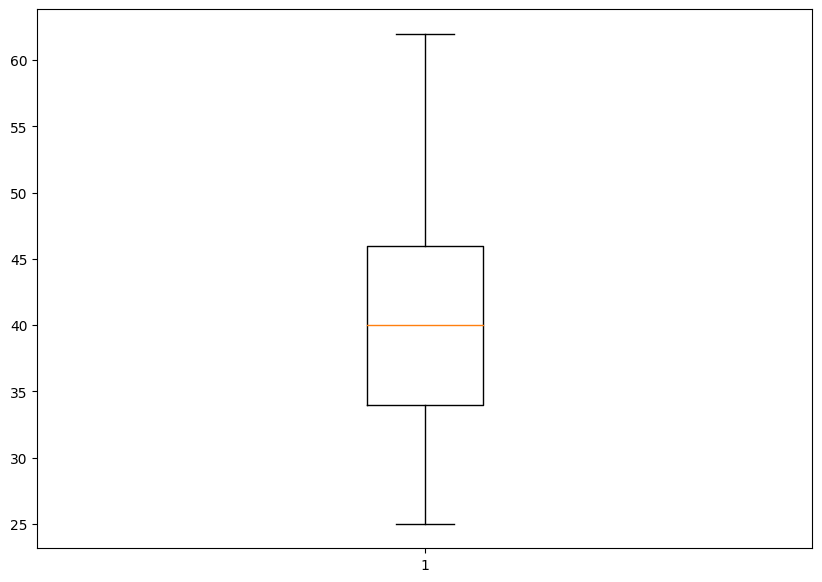

In [40]:
explainer.af_analysis()

In [20]:
ext_gen = explainer.extension_generator_from_graph()
#ext_gen = explainer.extension_generator_from_sat(file='../saves/adult_1000_sat.txt')
max_covi_ext = explainer.make_selection('max_covi', ext_gen)

Working with NetworkX to find naive extensions:
Graph density =  0.3447776329132261
Number of extensions:  2599
Time for selection:  0.08099961280822754
Len max_cov_exts:  1


In [21]:
#sel = explainer.make_selection(max_covi_ext, 'max_covc')
res = explainer.apply_inference(max_covi_ext, 'universal')
#print(res)

explainer.display_explanations()


id: 0 coverage: 3 Arg 1/1: frozenset({'Age_6.00 < Age <= 24.00', 'Sex_female', 'Fare_Fare > 31.00'})
id: 1 coverage: 25 Arg 1/1: frozenset({'Sex_male', 'Fare_Fare <= 7.92'})
id: 2 coverage: 15 Arg 1/2: frozenset({'Age_24.00 < Age <= 35.00', 'Sex_male', 'Fare_7.92 < Fare <= 14.45'})
id: 3 coverage: 25 Arg 1/1: frozenset({'Sex_male', 'Fare_Fare <= 7.92'})
id: 4 coverage: 15 Arg 1/1: frozenset({'Sex_male', 'Parch_0', 'Fare_7.92 < Fare <= 14.45'})
id: 5 coverage: 1 Arg 1/1: frozenset({'Age_6.00 < Age <= 24.00', 'Fare_14.45 < Fare <= 31.00', 'SibSp_0.00 < SibSp <= 1.00', 'Sex_male'})
id: 6 coverage: 25 Arg 1/1: frozenset({'Sex_male', 'Fare_Fare <= 7.92'})
id: 7 coverage: 4 Arg 1/1: frozenset({'Age_24.00 < Age <= 35.00', 'Fare_Fare > 31.00', 'Parch_0'})
id: 8 coverage: 4 Arg 1/1: frozenset({'SibSp_SibSp > 1.00', 'Age_Age <= 6.00', 'Fare_Fare > 31.00'})
id: 9 coverage: 3 Arg 1/1: frozenset({'Sex_female', 'Fare_Fare > 31.00', 'SibSp_SibSp <= 0.00'})
id: 10 coverage: 25 Arg 1/1: frozenset({'Sex

## Sat solver: ASPARTIX

In [ ]:
ext_gen = explainer.extension_generator(file='asp_test.txt')
max_covi_ext = explainer.make_selection(ext_gen, 'max_covi')

In [ ]:
explainer.set_strategy('max_covc', 'existence')
## Define strategy before calling explainer.explain()
explainer.display_explanations()

0.4019384124647283
Number of extensions: 1326480
Time spent on naive extensions: 55.99906277656555 s ( 86.23851943016052 )
len(max_cov_exts)= 1326478 / 1326480
Covc strategy's coverage: 2
Top 5 covs: [2, 2, 2, 2, 2]
id: 0 coverage: 1 Arg 1/12: frozenset({'Relationship_Husband', 'Country_United-States', 'Education_Some-college'})
id: 1 coverage: 1 Arg 1/10: frozenset({'Marital Status_Never-married', 'Age_37.00 < Age <= 48.00'})
id: 2 coverage: 1 Arg 1/22: frozenset({'Age_Age > 48.00', 'Occupation_Exec-managerial', 'Capital Gain_0', 'Workclass_Private'})
id: 3 coverage: 1 Arg 1/18: frozenset({'Hours per week_Hours per week <= 40.00', 'Occupation_Machine-op-inspct'})
id: 4 coverage: 1 Arg 1/17: frozenset({'Capital Loss_0', 'Capital Gain_0', 'Occupation_Sales', 'Hours per week_Hours per week <= 40.00', 'Relationship_Husband'})
id: 5 coverage: 1 Arg 1/8: frozenset({'Occupation_Farming-fishing', 'Hours per week_Hours per week <= 40.00'})
id: 6 coverage: 1 Arg 1/24: frozenset({'Education_Bach

In [ ]:
explainer.set_strategy('max_covc', 'universal')
## Define strategy before calling explainer.explain()
explainer.display_explanations()

0.40616693248272195
Number of extensions: 521076
len(max_cov_exts)= 521074 / 521076
Covc strategy's coverage: 2
Top 5 covs: [2, 2, 2, 2, 2]
id: 0 coverage: 0 Arg 1/0: None
id: 1 coverage: 0 Arg 1/0: None
id: 2 coverage: 0 Arg 1/0: None
id: 3 coverage: 0 Arg 1/0: None
id: 4 coverage: 0 Arg 1/0: None
id: 5 coverage: 0 Arg 1/0: None
id: 6 coverage: 0 Arg 1/0: None
id: 7 coverage: 0 Arg 1/0: None
id: 8 coverage: 0 Arg 1/0: None
id: 9 coverage: 0 Arg 1/0: None
id: 10 coverage: 0 Arg 1/0: None
id: 11 coverage: 0 Arg 1/0: None
id: 12 coverage: 0 Arg 1/0: None
id: 13 coverage: 0 Arg 1/0: None
id: 14 coverage: 0 Arg 1/0: None
id: 15 coverage: 0 Arg 1/0: None
id: 16 coverage: 0 Arg 1/0: None
id: 17 coverage: 0 Arg 1/0: None
id: 18 coverage: 0 Arg 1/0: None
id: 19 coverage: 0 Arg 1/0: None
id: 20 coverage: 0 Arg 1/0: None
id: 21 coverage: 0 Arg 1/0: None
id: 22 coverage: 0 Arg 1/0: None
id: 23 coverage: 0 Arg 1/0: None
id: 24 coverage: 0 Arg 1/0: None
id: 25 coverage: 0 Arg 1/0: None
id: 26 cover

In [ ]:
explainer.set_strategy('max_covi', 'universal')
## Define strategy before calling explainer.explain()
explainer.display_explanations()

0.40616693248272195
Number of extensions: 521076
len(max_cov_exts)= 12 / 521076
Covi strategy's coverage: 60
Top 5 covs: [58, 58, 58, 58, 58]
id: 0 coverage: 0 Arg 1/0: None
id: 1 coverage: 5 Arg 1/4: frozenset({'Relationship_Not-in-family', 'Occupation_Exec-managerial'})
id: 2 coverage: 0 Arg 1/0: None
id: 3 coverage: 3 Arg 1/1: frozenset({'Occupation_Machine-op-inspct', 'Age_28.00 < Age <= 37.00'})
id: 4 coverage: 0 Arg 1/0: None
id: 5 coverage: 2 Arg 1/1: frozenset({'Occupation_Farming-fishing', 'Age_28.00 < Age <= 37.00'})
id: 6 coverage: 2 Arg 1/1: frozenset({'Sex_Female', 'Occupation_Protective-serv'})
id: 7 coverage: 3 Arg 1/1: frozenset({'Occupation_Sales', 'Education_Bachelors'})
id: 8 coverage: 2 Arg 1/1: frozenset({'Occupation_?', 'Sex_Male'})
id: 9 coverage: 3 Arg 1/2: frozenset({'Occupation_Prof-specialty', 'Education_Bachelors', 'Workclass_Private'})
id: 10 coverage: 4 Arg 1/1: frozenset({'Occupation_Protective-serv', 'Sex_Male'})
id: 11 coverage: 1 Arg 1/1: frozenset({'A

In [ ]:
anchor_explainer = anchor_tabular.AnchorTabularExplainer(
    dataset.class_names,
    dataset.feature_names,
    dataset.train,
    dataset.categorical_names)
idx = 0
np.random.seed(1)
instance = dataset.train[idx].reshape(1, -1)[0]
print("Anchor")
print([dataset.categorical_names[i][int(r_)] for i, r_ in enumerate(instance)])

print('Prediction: ', anchor_explainer.class_names[c.predict(dataset.train[0].reshape(1, -1))[0]])
exp = anchor_explainer.explain_instance(dataset.train[idx], c.predict, threshold=0.95)
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())

print("Arg:", idx)
print(explainer.explain_instance(idx))

Anchor
['Age > 48.00', 'Self-emp-not-inc', 'Some-college', 'Married-civ-spouse', 'Sales', 'Husband', 'White', 'Male', '2', '0', '40.00 < Hours per week <= 45.00', 'United-States']
Prediction:  b'>50K'
Anchor: Capital Gain = 2
Precision: 1.00
Coverage: 0.07
Arg: 0
id: 0 coverage: 10 Args5/5: {frozenset({'Occupation_Sales', 'Age_Age > 48.00'}), frozenset({'Workclass_Self-emp-not-inc', 'Age_Age > 48.00'}), frozenset({'Workclass_Self-emp-not-inc', 'Occupation_Sales'}), frozenset({'Education_Some-college', 'Workclass_Self-emp-not-inc'}), frozenset({'Education_Some-college', 'Occupation_Sales', 'Country_United-States'})}
None
